In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer as ps
from nltk.corpus import stopwords
import collections
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import string 
import re
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, numpy, textblob, string


In [2]:
file=pd.read_csv("E:\\transfer.pcloud.dbfFG9vN\\s_first 50k.csv")

In [3]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(file['text'], file['stars'], test_size=0.30)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [4]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(file['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [5]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return (metrics.accuracy_score(predictions, valid_y), predictions)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
NB=train_model(ensemble.BaggingClassifier(KNeighborsClassifier(n_neighbors=187)),xtrain_tfidf, train_y, xvalid_tfidf)

In [23]:
print ("NB, WordLevel TF-IDF: ", NB[0])

NB, WordLevel TF-IDF:  0.6053333333333333


In [24]:
data={'Review':valid_x, 
      'Actual Stars':valid_y,
      'Predicted Stars': NB[1]}

In [25]:
df_NB = pd.DataFrame(data, columns=['Review','Actual Stars','Predicted Stars'])

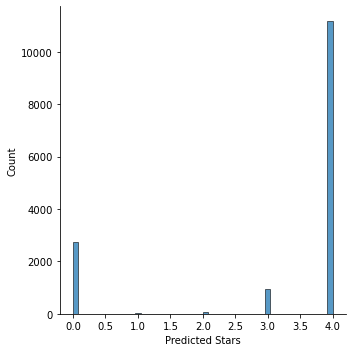

In [26]:
import seaborn as sns
sns.displot(df_NB, x="Predicted Stars")

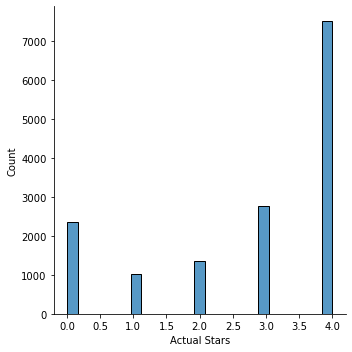

In [27]:
import seaborn as sns
sns.displot(df_NB, x="Actual Stars")

In [16]:
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)

print ("RF, WordLevel TF-IDF: ", accuracy[0])

RF, WordLevel TF-IDF:  0.629


In [17]:
data={'Review':valid_x, 
      'Actual Stars':valid_y,
      'Predicted Stars': accuracy[1]}

In [19]:
df_RF = pd.DataFrame(data, columns=['Review','Actual Stars','Predicted Stars'])

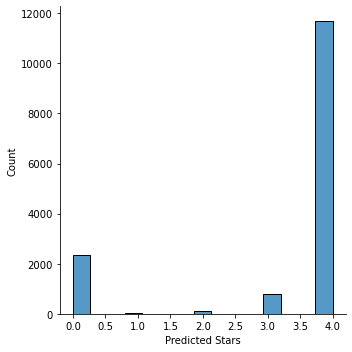

In [20]:
import seaborn as sns
sns.displot(df_RF, x="Predicted Stars")

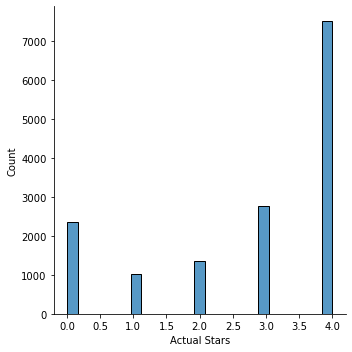

In [21]:
import seaborn as sns
sns.displot(df_RF, x="Actual Stars")